<a href="https://colab.research.google.com/github/gopal2812/system-design/blob/main/anomalydetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

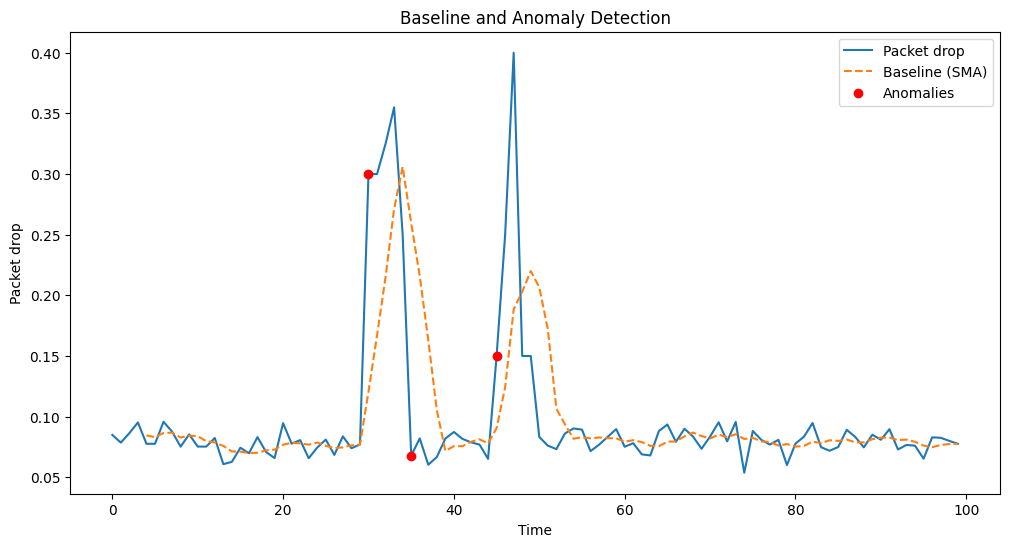

Detected anomalies at indices: [30, 35, 45]


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data (e.g., network traffic)
np.random.seed(42)  # For reproducibility
time_series = np.random.normal(loc=0.08, scale=0.01, size=100)  # Normal traffic with some randomness

# Add some anomalies
anomalies = [0.3, 0.3, 0.325, 0.355, 0.25]
time_series[30:35] = anomalies  # Inserting anomalies at different indices

# Add some anomalies
anomalies = [0.15, 0.25, 0.4, 0.15, 0.15]
time_series[45:50] = anomalies  # Inserting anomalies at different indices
# Convert to a pandas DataFrame for easier manipulation
df = pd.DataFrame(time_series, columns=["Packet drop"])

# Step 2: Calculate the baseline (Simple Moving Average)
window_size = 5
df["SMA"] = df["Packet drop"].rolling(window=window_size).mean()

# Step 3: Calculate the standard deviation for anomaly detection
df["SMA_std"] = df["Packet drop"].rolling(window=window_size).std()

# Step 4: Calculate Z-score (anomaly detection)
# Z-score = (X - mean) / std
df["Z-score"] = (df["Packet drop"] - df["SMA"]) / df["SMA_std"]

# Step 5: Set anomaly threshold (typically > 3 for a strong anomaly)
threshold = 1.65
df["Anomaly"] = np.where(np.abs(df["Z-score"]) > threshold, 1, 0)

# Step 6: Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df["Packet drop"], label="Packet drop")
plt.plot(df["SMA"], label="Baseline (SMA)", linestyle='--')
plt.scatter(df.index[df["Anomaly"] == 1], df["Packet drop"][df["Anomaly"] == 1], color="red", label="Anomalies", zorder=5)
plt.title("Baseline and Anomaly Detection")
plt.xlabel("Time")
plt.ylabel("Packet drop")
plt.legend()
plt.show()

# Print detected anomalies
print(f"Detected anomalies at indices: {df.index[df['Anomaly'] == 1].tolist()}")

In [29]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic data (e.g., network traffic)
np.random.seed(42)
time_series = np.random.normal(loc=50, scale=10, size=100)  # Normal traffic
anomalies = [150, 160, 170, 140, 155]
time_series[30:35] = anomalies  # Inserting anomalies at different indices

# Convert to pandas DataFrame
df = pd.DataFrame(time_series, columns=["Traffic"])

# Step 2: Scale data (important for Isolation Forest and other ML models)
scaler = StandardScaler()
df["Scaled_Traffic"] = scaler.fit_transform(df[["Traffic"]])

# Step 3: Apply Isolation Forest (anomaly detection)
# Fit an Isolation Forest model to the scaled traffic data
model = IsolationForest(contamination=0.05)  # 5% contamination, adjust as necessary
df["Anomaly_Flag"] = model.fit_predict(df[["Scaled_Traffic"]])

# Step 4: Convert anomaly flag to 0 (normal) and 1 (anomaly)
df["Anomaly_Flag"] = df["Anomaly_Flag"].apply(lambda x: 1 if x == -1 else 0)

# Step 5: Visualize the results
fig = go.Figure()

# Add normal data points
fig.add_trace(go.Scatter(x=df.index, y=df["Traffic"],
                         mode='lines', name="Traffic", line=dict(color='blue')))

# Add anomalies as red points
anomalies = df[df["Anomaly_Flag"] == 1]
fig.add_trace(go.Scatter(x=anomalies.index, y=anomalies["Traffic"],
                         mode='markers', name="Anomalies", marker=dict(color='red', size=10)))

fig.update_layout(
    title="Baseline and Anomaly Detection",
    xaxis_title="Time",
    yaxis_title="Traffic",
    template="plotly_dark"
)

fig.show()

# Print detected anomalies
print(f"Detected anomalies at indices: {anomalies.index.tolist()}")


Detected anomalies at indices: [30, 31, 32, 33, 74]


In [65]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic data (e.g., network traffic)
np.random.seed(42)
time_series = np.random.normal(loc=0.1, scale=0.01, size=100)  # Normal traffic
anomalies = [0.3, 0.25, 0.25, 0.2, 0.25]
time_series[30:35] = anomalies  # Inserting anomalies at different indices


anomalies = [0.2, 0.25, 0.2, 0.24, 0.23]
time_series[45:50] = anomalies  # Inserting anomalies at different indices

# Convert to pandas DataFrame
df = pd.DataFrame(time_series, columns=["Packet Drop"])

# Step 2: Scale data (important for Isolation Forest and other ML models)
scaler = StandardScaler()
df["Scaled_Traffic"] = scaler.fit_transform(df[["Packet Drop"]])

# Step 3: Apply Isolation Forest (anomaly detection)
# Fit an Isolation Forest model to the scaled traffic data
model = IsolationForest(contamination=0.13)  # 5% contamination, adjust as necessary
df["Anomaly_Flag"] = model.fit_predict(df[["Scaled_Traffic"]])

# Step 4: Convert anomaly flag to 0 (normal) and 1 (anomaly)
df["Anomaly_Flag"] = df["Anomaly_Flag"].apply(lambda x: 1 if x == -1 else 0)

# Step 5: Filter for upper-range anomalies (e.g., Traffic > 100)
upper_range_threshold = 0.12
df["Upper_Range_Anomaly"] = np.where((df["Packet Drop"] > upper_range_threshold) & (df["Anomaly_Flag"] == 1), 1, 0)

# Step 6: Visualize the results
fig = go.Figure()

# Add normal data points
fig.add_trace(go.Scatter(x=df.index, y=df["Packet Drop"],
                         mode='lines', name="Packet Drop", line=dict(color='blue')))

# Add upper-range anomalies as red points
upper_anomalies = df[df["Upper_Range_Anomaly"] == 1]
fig.add_trace(go.Scatter(x=upper_anomalies.index, y=upper_anomalies["Packet Drop"],
                         mode='markers', name="Upper Range Anomalies", marker=dict(color='red', size=10)))

fig.update_layout(
    title="Anomaly Detection using baseline",
    xaxis_title="Time",
    yaxis_title="Packet Drop",
    template="plotly_dark"
)

fig.show()

# Print detected upper-range anomalies
print(f"Detected upper-range anomalies at indices: {upper_anomalies.index.tolist()}")


Detected upper-range anomalies at indices: [30, 31, 32, 33, 34, 45, 46, 47, 48, 49]


In [ ]:
#@title Give me a name {display-mode: "form"}

# This code will be hidden when the notebook is loaded.


In [ ]:
#@title Give me a name {display-mode: "form"}

# This code will be hidden when the notebook is loaded.


In [ ]:
#@title Give me a name {display-mode: "form"}

# This code will be hidden when the notebook is loaded.


In [ ]:
!pip install --upgrade -q gspread

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('Your spreadsheet name').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))